In [1]:
import matplotlib.pyplot as plt
import sys
from os.path import dirname
sys.path.append(dirname('./synthcity/src/'))
sys.path.append(dirname('./gretel-synthetics/src/'))

In [9]:
# from synthcity.plugins import Plugins
# from synthcity.benchmark import Benchmarks
from synthcity.plugins.core.dataloader import TimeSeriesDataLoader
# from sklearn.preprocessing import MinMaxScaler
from synthcity.utils.datasets.time_series.sine import SineDataloader

In [4]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig

In [6]:
from gretel_synthetics.timeseries_dgan.config import DfStyle

In [7]:
static, temporal, observation_times, outcome = SineDataloader().load()

In [10]:
data = TimeSeriesDataLoader(
    temporal_data=temporal,
    observation_times=observation_times,
    static_data=static,
    outcome = outcome,
)

In [31]:
model = DGAN(DGANConfig(
    max_sequence_len=10,
    sample_len=10,
    batch_size=32,
    apply_feature_scaling=True,
    apply_example_scaling=False,
    use_attribute_discriminator=False,
    generator_learning_rate=1e-4,
    discriminator_learning_rate=1e-4,
    epochs=100,
    dp_enabled=True,
    dp_eps=1e-1
))

In [32]:
model.train_dataframe(
    data.dataframe(),
    attribute_columns=["seq_out_0", "seq_static_0", "seq_static_1","seq_static_2", "seq_static_3"],
    feature_columns=["seq_temporal_0", "seq_temporal_1", "seq_temporal_2", "seq_temporal_3", "seq_temporal_4"],
    time_column = "seq_time_id",
    example_id_column = "seq_id",
    df_style = DfStyle.LONG
)

In [33]:
data.dataframe()

,seq_id,seq_time_id,seq_static_0,seq_static_1,seq_static_2,seq_static_3,seq_temporal_0,seq_temporal_1,seq_temporal_2,seq_temporal_3,seq_temporal_4,seq_out_0
0,0,0,0.113455,0.529303,0.226056,0.709105,-0.132880,0.642053,-0.445929,-0.700284,-0.140357,1
1,0,1,0.113455,0.529303,0.226056,0.709105,0.710333,0.894481,-0.291091,-0.142378,0.429881,1
2,0,2,0.113455,0.529303,0.226056,0.709105,0.989875,0.998573,-0.128169,0.470685,0.857063,1
3,0,3,0.113455,0.529303,0.226056,0.709105,0.483922,0.937066,0.038313,0.901403,0.999035,1
4,0,4,0.113455,0.529303,0.226056,0.709105,-0.406038,0.720160,0.203731,0.982912,0.808551,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,99,5,0.330813,0.599656,0.451710,0.917921,-0.966615,0.312915,0.987326,-0.040674,-0.419472,0
996,99,6,0.330813,0.599656,0.451710,0.917921,-0.350444,-0.100297,0.971338,-0.620759,-0.921807,0
997,99,7,0.330813,0.599656,0.451710,0.917921,0.560991,-0.496179,0.802464,-0.963219,-0.942163,0
998,99,8,0.330813,0.599656,0.451710,0.917921,0.999767,-0.806329,0.507284,-0.936962,-0.469898,0


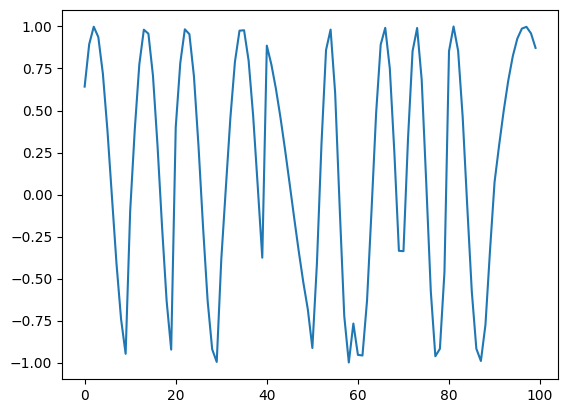

In [34]:
plt.plot(data.dataframe()['seq_temporal_1'][:100])

In [35]:
synthetic_df_dopple = model.generate_dataframe(int(len(data.dataframe())/10))

In [36]:
synthetic_df_dopple

,seq_id,seq_time_id,seq_static_0,seq_static_1,seq_static_2,seq_static_3,seq_temporal_0,seq_temporal_1,seq_temporal_2,seq_temporal_3,seq_temporal_4,seq_out_0
0,0,0,0.625592,0.615429,0.533758,0.374526,-0.005997,-0.226543,0.132404,-0.250210,0.176365,0.815536
1,0,1,0.625592,0.615429,0.533758,0.374526,0.309613,0.204331,0.145154,0.064142,-0.196635,0.815536
2,0,2,0.625592,0.615429,0.533758,0.374526,-0.185482,-0.245869,0.227766,0.264338,-0.255929,0.815536
3,0,3,0.625592,0.615429,0.533758,0.374526,0.285049,0.297216,-0.143933,-0.183182,-0.146893,0.815536
4,0,4,0.625592,0.615429,0.533758,0.374526,0.044019,0.325257,-0.313685,0.198285,-0.087365,0.815536
...,...,...,...,...,...,...,...,...,...,...,...,...
995,99,5,0.903475,0.860130,0.485319,0.935247,-0.265622,-0.011327,0.223076,-0.215456,0.322290,0.049374
996,99,6,0.903475,0.860130,0.485319,0.935247,-0.327563,0.308162,-0.173726,-0.289002,-0.216926,0.049374
997,99,7,0.903475,0.860130,0.485319,0.935247,-0.102910,-0.107629,-0.265893,-0.278040,0.048433,0.049374
998,99,8,0.903475,0.860130,0.485319,0.935247,-0.167943,-0.228092,0.276992,-0.215720,0.265036,0.049374


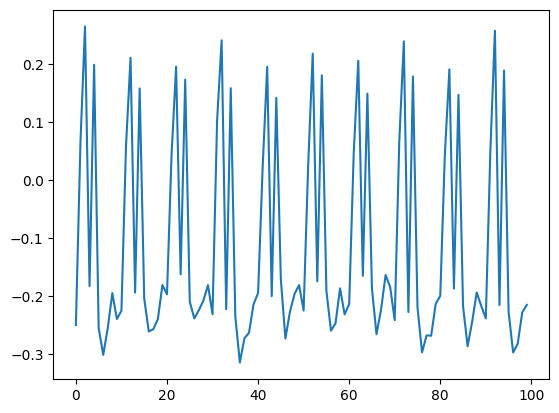

In [37]:
plt.plot(synthetic_df_dopple['seq_temporal_3'][:100])